In [1]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, f
from scipy import stats
import matplotlib.pyplot as plt

## Welch's ANOVA Implementation

In [2]:
#Welch's anova
def weight(arr):
    n = len(arr)
    sig2 = (np.var(arr, ddof=1))**2
    return n/sig2

def W_sum(*arrays):
    s=0
    for arr in arrays:
        s+=weight(arr)
    return s
    
def MS(*arrays):
    s=0
    W = W_sum(*arrays)
    for arr in arrays:
        s+=arr.mean()*weight(arr)
    return s/W

def Numerator(*arrays):
    k=len(arrays)
    s=0
    for arr in arrays:
        s+=(arr.mean() - MS(*arrays))**2*weight(arr)
    return s/(k-1)

def A(*arrays):
    s=0
    W = W_sum(*arrays)
    for arr in arrays:
        s+= ((1-weight(arr)/W)**2)/(len(arr)-1)
    return s

def Denominator(*arrays):
    k=len(arrays)
    return 3*A(*arrays)*(k-2)/(k**2-1)+1

def DoF(*arrays):
    k = len(arrays)
    DF_Numerator = k-1
    DF_Denominator = (k**2-1)/(3*A(*arrays))
    return DF_Numerator, DF_Denominator
        
def Welch_anova(*arrays):
    DFNum = DoF(*arrays)[0]
    DFDen = DoF(*arrays)[1]
    F = Numerator(*arrays)/Denominator(*arrays)
    p = stats.f.sf(F, DFNum, DFDen)
    return F,p


## Whelch's ANOVA VS traditional ANOVA

In [3]:
def comparison_anova(*arrays):
    F = f_oneway(*arrays)[0]
    p = f_oneway(*arrays)[1]
    Welch_F = Welch_anova(*arrays)[0]
    Welch_p = Welch_anova(*arrays)[1]
    print('statistic= %f'%F, 'pvalue= %f'%p)
    if p > 0.05:
        print('Accept Ho')
    else:
        print('Reject Ho')   
    print('\n')    
    print('W_statistic= %f'%Welch_F, 'W_pvalue= %f'%Welch_p)    
    if Welch_p > 0.05:
        print('Accept Ho')
    else:
        print('Reject Ho')   
    print('\n')

#'Accept Ho: All input samples are from populations with equal means (alpha = 5%)'
#'Reject Ho: All input samples are not from populations with equal means (alpha = 5%)'

## Examples

### == means <br> == variances <br> == sizes

In [4]:
a = np.random.normal(0, 1, size=10000)
b = np.random.normal(0, 1, size=10000)
c = np.random.normal(0, 1, size=10000)
comparison_anova(a,b,c)

statistic= 1.041478 pvalue= 0.352945
Accept Ho


W_statistic= 1.029274 W_pvalue= 0.357285
Accept Ho




In [5]:
a = np.random.normal(104, 20, size=10000)
b = np.random.normal(104, 20, size=10000)
c = np.random.normal(104, 20, size=10000)
comparison_anova(a,b,c)

statistic= 6.455091 pvalue= 0.001575
Reject Ho


W_statistic= 0.015804 W_pvalue= 0.984320
Accept Ho




### == means <br>== variances <br> ! = sizes

In [6]:
a = np.random.normal(0, 1, size=50)
b = np.random.normal(0, 1, size=800)
c = np.random.normal(0, 1, size=5000)
comparison_anova(a,b,c)

statistic= 0.732989 pvalue= 0.480515
Accept Ho


W_statistic= 0.881429 W_pvalue= 0.416696
Accept Ho




In [7]:
a = np.random.normal(0, 1, size=50)
b = np.random.normal(0, 1, size=800)
c = np.random.normal(0, 1, size=5000)
comparison_anova(a,b,c)

statistic= 0.502194 pvalue= 0.605227
Accept Ho


W_statistic= 0.507834 W_pvalue= 0.603016
Accept Ho




In [8]:
a = np.random.normal(0, 1.1, size=50)
b = np.random.normal(0, 1.1, size=800)
c = np.random.normal(0, 1.1, size=5000)
comparison_anova(a,b,c)

statistic= 0.042891 pvalue= 0.958016
Accept Ho


W_statistic= 0.043178 W_pvalue= 0.957755
Accept Ho




In [9]:
a = np.random.normal(29, 10, size=50)
b = np.random.normal(29, 10, size=800)
c = np.random.normal(29, 10, size=200)
comparison_anova(a,b,c)

statistic= 0.538719 pvalue= 0.583657
Accept Ho


W_statistic= 0.005160 W_pvalue= 0.994853
Accept Ho




In [10]:
a = np.random.normal(100, 10, size=50)
b = np.random.normal(100, 10, size=800)
c = np.random.normal(100, 10, size=200)
comparison_anova(a,b,c)

statistic= 1.063486 pvalue= 0.345623
Accept Ho


W_statistic= 0.010657 W_pvalue= 0.989401
Accept Ho




In [11]:
a = np.random.normal(29, 0.1, size=5000)
b = np.random.normal(29, 0.1, size=800)
c = np.random.normal(29, 0.1, size=20000)
comparison_anova(a,b,c)

statistic= 0.156953 pvalue= 0.854745
Accept Ho


W_statistic= 15.693940 W_pvalue= 0.000000
Reject Ho




In [12]:
a = np.random.normal(29, 0.41, size=5000)
b = np.random.normal(29, 0.41, size=800)
c = np.random.normal(29, 0.41, size=20000)
comparison_anova(a,b,c)

statistic= 0.393815 pvalue= 0.674483
Accept Ho


W_statistic= 2.298113 W_pvalue= 0.100709
Accept Ho




#### Variances are all equal, though results highly depends on the value of the variance. Note that variances less then or equal to 1 behave them unstable and lead to rejecting the Ho hypothesis.  Weights get too big when variances get close to 0, as weights are inversely proptional to square of variances, so it's somewhat expected to have this kind of poor results on that. Maybe it can be controlled by appropriate sample size though it's not the thing we should manage.

https://scholarscompass.vcu.edu/cgi/viewcontent.cgi?article=5026&context=etd
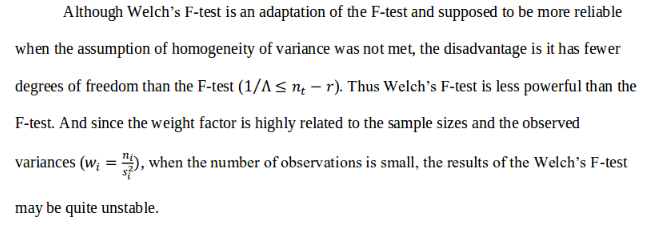

### == means <br> ! = variances <br> = = sizes

In [13]:
a = np.random.normal(0, 1, size=10000)
b = np.random.normal(0, 1.5, size=10000)
c = np.random.normal(0, 0.23, size=10000)
comparison_anova(a,b,c)

statistic= 0.405246 pvalue= 0.666816
Accept Ho


W_statistic= 0.780858 W_pvalue= 0.458034
Accept Ho




In [14]:
a = np.random.normal(0, 10, size=10000)
b = np.random.normal(0, 3.5, size=10000)
c = np.random.normal(0, 0.23, size=10000)
comparison_anova(a,b,c)

statistic= 0.078067 pvalue= 0.924903
Accept Ho


W_statistic= 0.006051 W_pvalue= 0.993967
Accept Ho




In [15]:
a = np.random.normal(100, 89, size=10000)
b = np.random.normal(100, 24, size=10000)
c = np.random.normal(100, 0.1, size=10000)
comparison_anova(a,b,c)

statistic= 0.769692 pvalue= 0.463165
Accept Ho


W_statistic= 0.000346 W_pvalue= 0.999654
Accept Ho




In [16]:
a = np.random.normal(100, 0.4, size=10000)
b = np.random.normal(100, 0.6, size=10000)
c = np.random.normal(100, 0.1, size=10000)
comparison_anova(a,b,c)

statistic= 0.541344 pvalue= 0.581971
Accept Ho


W_statistic= 7.246724 W_pvalue= 0.000715
Reject Ho




### == means <br>! = variances <br> ! = sizes

In [17]:
a = np.random.normal(0, 1, size=10000)
b = np.random.normal(0, 1.5, size=15000)
c = np.random.normal(0, 0.23, size=6000)
comparison_anova(a,b,c)

statistic= 1.495446 pvalue= 0.224165
Accept Ho


W_statistic= 1.135651 W_pvalue= 0.321239
Accept Ho




In [18]:
a = np.random.normal(0, 10, size=1000)
b = np.random.normal(0, 1.5, size=150)
c = np.random.normal(0, 223, size=10000)
comparison_anova(a,b,c)

statistic= 0.043145 pvalue= 0.957773
Accept Ho


W_statistic= 0.002199 W_pvalue= 0.997803
Accept Ho




In [19]:
a = np.random.normal(111, 100, size=1000)
b = np.random.normal(111, 1.5, size=15000)
c = np.random.normal(111, 34, size=300)
comparison_anova(a,b,c)

statistic= 37.623700 pvalue= 0.000000
Reject Ho


W_statistic= 0.000267 W_pvalue= 0.999733
Accept Ho




In [20]:
a = np.random.normal(111, 0.1, size=1000)
b = np.random.normal(111, 0.4, size=15000)
c = np.random.normal(111, 0.8, size=300)
comparison_anova(a,b,c)

statistic= 5.603438 pvalue= 0.003692
Reject Ho


W_statistic= 3.890922 W_pvalue= 0.020823
Reject Ho




### ! = means <br>== variances <br> == sizes

In [21]:
a = np.random.normal(0, 1, size=10000)
b = np.random.normal(1e-1000, 1, size=10000)
c = np.random.normal(1e-2, 1, size=10000)
comparison_anova(a,b,c)

statistic= 1.914376 pvalue= 0.147452
Accept Ho


W_statistic= 1.893702 W_pvalue= 0.150541
Accept Ho




In [22]:
a = np.random.normal(0, 1, size=10000)
b = np.random.normal(1e-1000, 1, size=10000)
c = np.random.normal(1e-2, 1, size=10000)
comparison_anova(a,b,c)

statistic= 1.561080 pvalue= 0.209926
Accept Ho


W_statistic= 1.549279 W_pvalue= 0.212427
Accept Ho




In [23]:
a = np.random.normal(0, 100, size=10000)
b = np.random.normal(1e-1000, 100, size=10000)
c = np.random.normal(1e-2, 100, size=10000)
comparison_anova(a,b,c)

statistic= 0.285180 pvalue= 0.751881
Accept Ho


W_statistic= 0.000028 W_pvalue= 0.999972
Accept Ho




In [24]:
a = np.random.normal(0, 100, size=10000)
b = np.random.normal(10, 100, size=10000)
c = np.random.normal(2, 100, size=10000)
comparison_anova(a,b,c)

statistic= 30.740753 pvalue= 0.000000
Reject Ho


W_statistic= 0.003035 W_pvalue= 0.996970
Accept Ho




In [25]:
a = np.random.normal(0, 10, size=10000)
b = np.random.normal(10, 10, size=10000)
c = np.random.normal(2, 10, size=10000)
comparison_anova(a,b,c)

statistic= 2863.819020 pvalue= 0.000000
Reject Ho


W_statistic= 29.520666 W_pvalue= 0.000000
Reject Ho




In [26]:
#error 404 not found...
a = np.random.normal(-9, 10000, size=1000000)
b = np.random.normal(10, 10000, size=1000000)
c = np.random.normal(2, 10000, size=1000000)
comparison_anova(a,b,c)

statistic= 1.048135 pvalue= 0.350591
Accept Ho


W_statistic= 0.000000 W_pvalue= 1.000000
Accept Ho




### ! = means <br>== variances <br> ! = sizes

In [27]:
a = np.random.normal(0, 1, size=10000)
b = np.random.normal(1e-1000, 1, size=3000)
c = np.random.normal(1e-2, 1, size=500)
comparison_anova(a,b,c)

statistic= 0.787125 pvalue= 0.455172
Accept Ho


W_statistic= 0.810606 W_pvalue= 0.444813
Accept Ho




In [28]:
a = np.random.normal(0, 1, size=10000)
b = np.random.normal(-1, 1, size=3000)
c = np.random.normal(10, 1, size=500)
comparison_anova(a,b,c)

statistic= 26291.964026 pvalue= 0.000000
Reject Ho


W_statistic= 22234.419072 W_pvalue= 0.000000
Reject Ho




In [29]:
#error 404
a = np.random.normal(0, 100, size=1000)
b = np.random.normal(-1, 100, size=300)
c = np.random.normal(10, 100, size=2000)
comparison_anova(a,b,c)

statistic= 6.859270 pvalue= 0.001065
Reject Ho


W_statistic= 0.000667 W_pvalue= 0.999333
Accept Ho




In [30]:
#error 404
a = np.random.normal(100, 100, size=10000)
b = np.random.normal(20, 100, size=3000)
c = np.random.normal(10, 100, size=20000)
comparison_anova(a,b,c)

statistic= 2749.401942 pvalue= 0.000000
Reject Ho


W_statistic= 0.271983 W_pvalue= 0.761874
Accept Ho




In [31]:
a = np.random.normal(0, 11, size=1000)
b = np.random.normal(10, 11, size=300)
c = np.random.normal(30, 11, size=2000)
comparison_anova(a,b,c)

statistic= 2539.779194 pvalue= 0.000000
Reject Ho


W_statistic= 19.949216 W_pvalue= 0.000000
Reject Ho




In [32]:
a = np.random.normal(0, 110, size=1000)
b = np.random.normal(10, 110, size=300)
c = np.random.normal(30, 110, size=2000)
comparison_anova(a,b,c)

statistic= 31.442666 pvalue= 0.000000
Reject Ho


W_statistic= 0.002514 W_pvalue= 0.997490
Accept Ho




### ! = means <br>! = variances <br> == sizes

In [33]:
a = np.random.normal(0, 2, size=10000)
b = np.random.normal(1e-1000, 0.2, size=10000)
c = np.random.normal(1e-2, 1.3, size=10000)
comparison_anova(a,b,c)

statistic= 0.458295 pvalue= 0.632365
Accept Ho


W_statistic= 0.443435 W_pvalue= 0.641837
Accept Ho




In [34]:
a = np.random.normal(10, 2, size=10000)
b = np.random.normal(11, 20, size=10000)
c = np.random.normal(12, 13, size=10000)
comparison_anova(a,b,c)

statistic= 44.558765 pvalue= 0.000000
Reject Ho


W_statistic= 0.593749 W_pvalue= 0.552268
Accept Ho




In [35]:
a = np.random.normal(10, 2, size=10000)
b = np.random.normal(21, 20, size=10000)
c = np.random.normal(12, 13, size=10000)
comparison_anova(a,b,c)

statistic= 1743.723903 pvalue= 0.000000
Reject Ho


W_statistic= 4.492042 W_pvalue= 0.011215
Reject Ho




In [36]:
#error 404
a = np.random.normal(10, 2, size=100)
b = np.random.normal(21, 20, size=100)
c = np.random.normal(12, 13, size=100)
comparison_anova(a,b,c)

statistic= 27.911283 pvalue= 0.000000
Reject Ho


W_statistic= 0.062204 W_pvalue= 0.939719
Accept Ho




In [37]:
#error 404
a = np.random.normal(10, 100, size=500)
b = np.random.normal(21, 20, size=500)
c = np.random.normal(12, 13, size=500)
comparison_anova(a,b,c)

statistic= 3.184600 pvalue= 0.041675
Reject Ho


W_statistic= 0.078648 W_pvalue= 0.924373
Accept Ho




In [38]:
a = np.random.normal(100, 2, size=100)
b = np.random.normal(21, 20, size=100)
c = np.random.normal(3, 13, size=100)
comparison_anova(a,b,c)

statistic= 1517.021883 pvalue= 0.000000
Reject Ho


W_statistic= 22.901735 W_pvalue= 0.000000
Reject Ho




### ! = means <br>! = variances <br> ! = sizes

In [39]:
a = np.random.normal(0, 3, size=300)
b = np.random.normal(1e-1000, 1.5, size=2000)
c = np.random.normal(1e-2, 0.4, size=6000)
comparison_anova(a,b,c)

statistic= 0.675045 pvalue= 0.509161
Accept Ho


W_statistic= 0.009315 W_pvalue= 0.990728
Accept Ho




In [40]:
a = np.random.normal(100, 3, size=300)
b = np.random.normal(13, 1.5, size=2000)
c = np.random.normal(-2, 0.4, size=6000)
comparison_anova(a,b,c)

statistic= 1540445.911576 pvalue= 0.000000
Reject Ho


W_statistic= 58878.719432 W_pvalue= 0.000000
Reject Ho




In [41]:
a = np.random.normal(111, 300, size=30000)
b = np.random.normal(115, 15, size=2000)
c = np.random.normal(110, 190, size=6000)
comparison_anova(a,b,c)

statistic= 0.373177 pvalue= 0.688546
Accept Ho


W_statistic= 0.000108 W_pvalue= 0.999892
Accept Ho




In [42]:
a = np.random.normal(111, 300, size=30000)
b = np.random.normal(215, 15, size=2000)
c = np.random.normal(910, 190, size=6000)
comparison_anova(a,b,c)

statistic= 20983.204044 pvalue= 0.000000
Reject Ho


W_statistic= 1.148756 W_pvalue= 0.317062
Accept Ho




In [43]:
a = np.random.normal(111, 300, size=30000)
b = np.random.normal(215, 100, size=2000)
c = np.random.normal(910, 109, size=6000)
comparison_anova(a,b,c)

statistic= 22048.317560 pvalue= 0.000000
Reject Ho


W_statistic= 3.874123 W_pvalue= 0.020806
Reject Ho


